In [1]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Counting perfect numbers

In [2]:
# A perfect number is a positive integer that is equal to the sum of its positive divisors, excluding itself.


# create a function that tests whether the input is a perfect number
def test4perfect(number):

    # initialize
    divisors = []

    # find integer divisors
    for d in range(1,number):
        if number%d == 0:
            divisors.append(d)
  
    # test for equality
    return sum(divisors)==number

In [3]:
test4perfect(30)

False

In [4]:
perfect = []

for number in range(2,10001):
    if test4perfect(number):
        perfect.append(number)

print(perfect)

[6, 28, 496, 8128]


In [5]:
# implement the function as a list-comprehension

def test4perfect(number):
    return number == sum([d for d in range (1,number) if number%d==0])

In [6]:
## list comprehension intro

# as a loop
lst = []
for i in range(10):
    lst.append(i**2)
    
# as list comprehension
lst2 = [i**2 for i in range(10)]

print(lst)
print(lst2)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# Euclid's Pythagorean triplets

$a=m^{2}-n^{2}\\
b=2mn\\
c=m^{2}+n^{2}\\
m>n$

In [7]:
# specify range of numbers
numberrange = np.arange(2,51)

# initialize empty lists
a = []
b = []
c = []

for m in numberrange:
    for n in numberrange:
        a.append( m**2 - n**2 )
        b.append( 2*m*n )
        c.append( m**2 + n**2 )

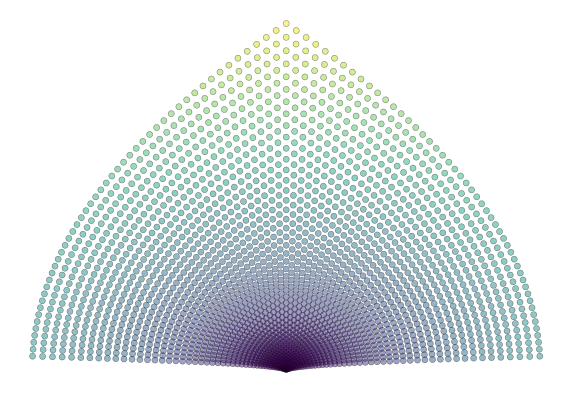

In [8]:
fig,ax = plt.subplots(1,figsize=(10,7))
plt.scatter(a,b,c=c, marker='o',alpha=.5,linewidths=.5,edgecolors='k')
plt.axis('off')
plt.show()

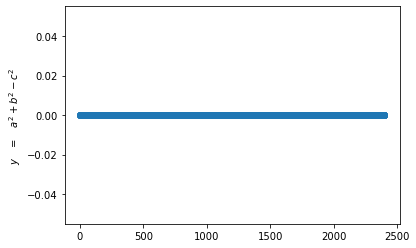

In [9]:
check = np.array(a)**2 + np.array(b)**2 - np.array(c)**2

plt.plot(check,'o')
plt.ylabel('$y \quad = \quad a^2+b^2-c^2$')
plt.show()

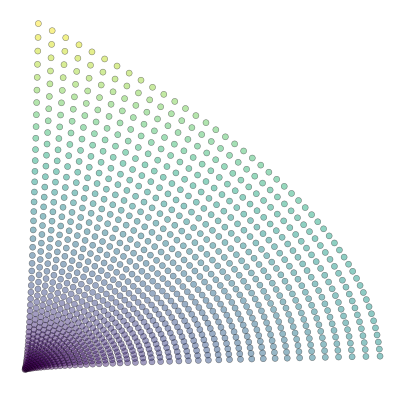

In [10]:
# initialize empty lists
a = []
b = []
c = []

for m in numberrange:
    for n in range(numberrange[0],m):
        a.append( m**2 - n**2 )
        b.append( 2*m*n )
        c.append( m**2 + n**2 )

fig,ax = plt.subplots(1,figsize=(7,7))
plt.scatter(a,b,c=c, marker='o',alpha=.5,linewidths=.5,edgecolors='k')
plt.axis('off')
plt.show()

# Fermat's theorem

There are no integer solutions to $x^3+y^3=z^3$

In [11]:
ints = np.arange(1,101)

z = np.zeros((len(ints),len(ints)))

# run the simulation
for x in ints:
    for y in ints:
        z[x-1,y-1] = (x**3 + y**3)**(1/3)

In [12]:
# check for integers
zInts = z%1 == 0

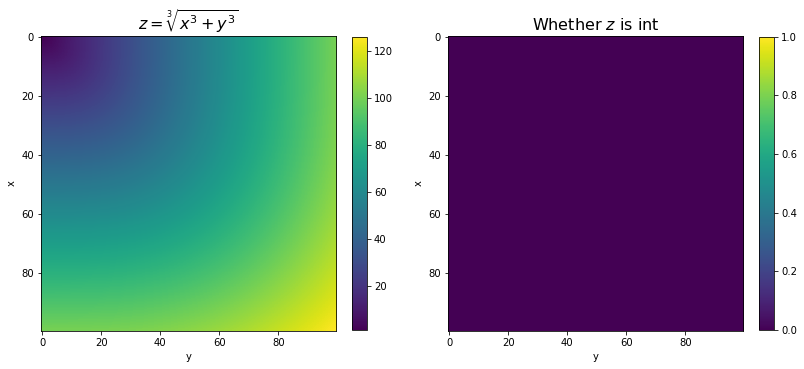

In [13]:
# now visualize
fig,ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout(pad=5)

# show the resulting z-values
h = ax[0].imshow(z)
fig.colorbar(h,ax=ax[0],fraction=.045)
ax[0].set_xlabel('y')
ax[0].set_ylabel('x')
ax[0].set_title('$z=\sqrt[3]{x^3+y^3}$',fontsize=16)

# show the boolean integer map
h = ax[1].imshow(zInts,vmin=0,vmax=1)
fig.colorbar(h,ax=ax[1],fraction=.045)
ax[1].set_xlabel('y')
ax[1].set_ylabel('x')
ax[1].set_title('Whether $z$ is int',fontsize=16)

plt.show()

# Plotting number sequences


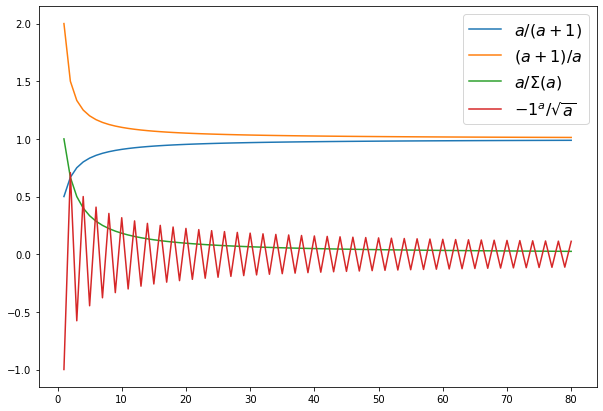

In [14]:
# initialize
s1 = np.array([])
s2 = np.array([])
s3 = np.array([])
s4 = np.array([])
xx = np.arange(1,81)


# generate the sequences
for n in xx:
    s1 = np.append(s1,n/(n+1))
    s2 = np.append(s2,(n+1)/n)
    s3 = np.append(s3,n/sum(np.arange(1,n+1)))
    s4 = np.append(s4,(-1)**n/np.sqrt(n))


# plotting
fig,ax = plt.subplots(1,figsize=(10,7))
plt.plot(xx,s1,label='$a/(a+1)$')
plt.plot(xx,s2,label='$(a+1)/a$')
plt.plot(xx,s3,label='$a/\Sigma(a)$')
plt.plot(xx,s4,label='$-1^a/\sqrt{a}$')
plt.legend(loc='upper right',fontsize=16)
plt.show()

# Heron's method of square roots

In [18]:
# Let's test the algorithm in a simple example
num = 100

# initialze the first guess
x = num/3

# now run through the algorithm
for n in range(5):
    x = ( x + num/x )/2
    print(x)

x

18.166666666666668
11.835626911314986
10.142346754539993
10.000998910755985
10.000000049886152


10.000000049886152

In [19]:
# define the numbers to compute
nums2sqrt = np.linspace(2,101,50)

# range of algorithm iterations
niterations = np.arange(3,9)


# initialize matrix of estimates
err = np.zeros((len(niterations),len(nums2sqrt)))


# loop over the numbers to compute
for ni,num in enumerate(nums2sqrt):
  
    # loop over number of iterations
    for ii,iters in enumerate(niterations):
  
        # initial guess
        x = num/3
      
        # implement algorithm
        for n in range(iters):
            x = ( x + num/x )/2
      
        # store error magnitude
        err[ii,ni] = abs(x-np.sqrt(num))

<ipython-input-20-6322c0f81263>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])


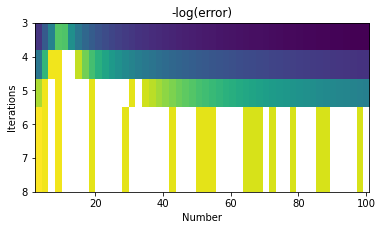

In [20]:
plt.imshow(-np.log(err),aspect=10,extent=[nums2sqrt[0],nums2sqrt[-1],niterations[-1],niterations[0]])
plt.xlabel('Number')
plt.ylabel('Iterations')
plt.title('-log(error)')
plt.show()

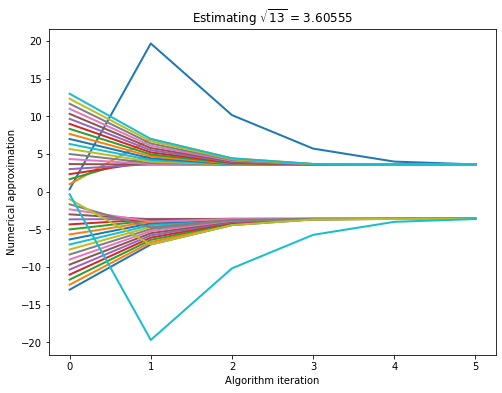

In [21]:
# select target number to compute square root of
targnum = 13

# range of starting values
starting = np.linspace(-targnum,targnum,40)

# number of iterations (fixed)
niters = 5

# initialize output matrix
sqrtAlgResults = np.zeros((len(starting),niters+1))


# loop over starting numbers
for idx,startnum in enumerate(starting):
    
    # initialize starting number as a list!
    x = [startnum]
    
    # now run through the algorithm
    for n in range(niters):
        betterguess = ( x[n] + targnum/x[n] )/2
        x.append( betterguess )
    
    sqrtAlgResults[idx,:] = x


# finally, plot the results
fig,ax = plt.subplots(1,figsize=(8,6))
plt.plot(np.arange(niters+1),sqrtAlgResults.T,linewidth=2)
plt.xlabel('Algorithm iteration')
plt.ylabel('Numerical approximation')
plt.title('Estimating $\sqrt{%g}$ = %g' %(targnum,sqrtAlgResults[-1,-1]))
plt.show()

# Smooth numbers




<ipython-input-22-2bcc2ca0995d>:5: RuntimeWarning: invalid value encountered in true_divide
  largestPrimeFact = np.zeros(maxN+1,dtype=int)/0


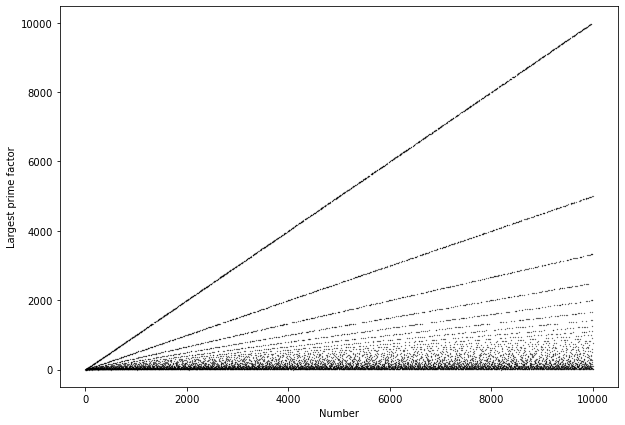

In [22]:
# largest number to search in
maxN = 10000

# find the largest prime factor
largestPrimeFact = np.zeros(maxN+1,dtype=int)/0

for i in range(2,maxN+1): # note: start at 2! not zero!
    largestPrimeFact[i] = np.max(sym.primefactors(i))

# show the smooth numbers on a plot
fig,ax = plt.subplots(1,figsize=(10,7))
plt.plot(largestPrimeFact,'k.',markersize=.5)
plt.xlabel('Number')
plt.ylabel('Largest prime factor')
plt.show()

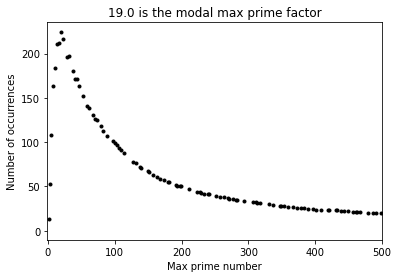

In [23]:
# count the number of occurrences of maximum prime factors

# find all unique max primes (basically all the primes)
uniqueMaxPrimes = np.unique(largestPrimeFact)

# count the number of times each max-prime appears
num = np.zeros(len(uniqueMaxPrimes),dtype=int)
for i,u in enumerate(uniqueMaxPrimes):
    num[i] = np.sum(largestPrimeFact==u)

# and visualize the counts by the smooth numbers
plt.plot(uniqueMaxPrimes,num,'k.')
plt.xlabel('Max prime number')
plt.ylabel('Number of occurrences')
plt.xlim([-1,500])
plt.title('%s is the modal max prime factor' %uniqueMaxPrimes[np.argmax(num)])
plt.show()

In [24]:
# list all of the 5-smooth numbers up to maxN
numberlist = np.arange(maxN+1)

print('All 5-smooth numbers up to 10000:')
print( numberlist[largestPrimeFact<=5] )

All 5-smooth numbers up to 10000:
[    2     3     4     5     6     8     9    10    12    15    16    18
    20    24    25    27    30    32    36    40    45    48    50    54
    60    64    72    75    80    81    90    96   100   108   120   125
   128   135   144   150   160   162   180   192   200   216   225   240
   243   250   256   270   288   300   320   324   360   375   384   400
   405   432   450   480   486   500   512   540   576   600   625   640
   648   675   720   729   750   768   800   810   864   900   960   972
  1000  1024  1080  1125  1152  1200  1215  1250  1280  1296  1350  1440
  1458  1500  1536  1600  1620  1728  1800  1875  1920  1944  2000  2025
  2048  2160  2187  2250  2304  2400  2430  2500  2560  2592  2700  2880
  2916  3000  3072  3125  3200  3240  3375  3456  3600  3645  3750  3840
  3888  4000  4050  4096  4320  4374  4500  4608  4800  4860  5000  5120
  5184  5400  5625  5760  5832  6000  6075  6144  6250  6400  6480  6561
  6750  6912  720

In [25]:
sym.primefactors(4374)

[2, 3]

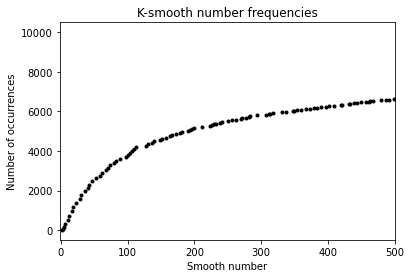

In [26]:
# adjust the previous code to plot the count of k-smooth numbers

# count the number of times each smooth number appears
smoothCount = np.zeros(len(uniqueMaxPrimes),dtype=int)
for i,u in enumerate(uniqueMaxPrimes):
    smoothCount[i] = len(numberlist[largestPrimeFact<=u])


# and visualize the counts by the smooth numbers
plt.plot(uniqueMaxPrimes,smoothCount,'k.')
plt.xlabel('Smooth number')
plt.ylabel('Number of occurrences')
plt.xlim([-1,500])
plt.title('K-smooth number frequencies')
plt.show()